In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


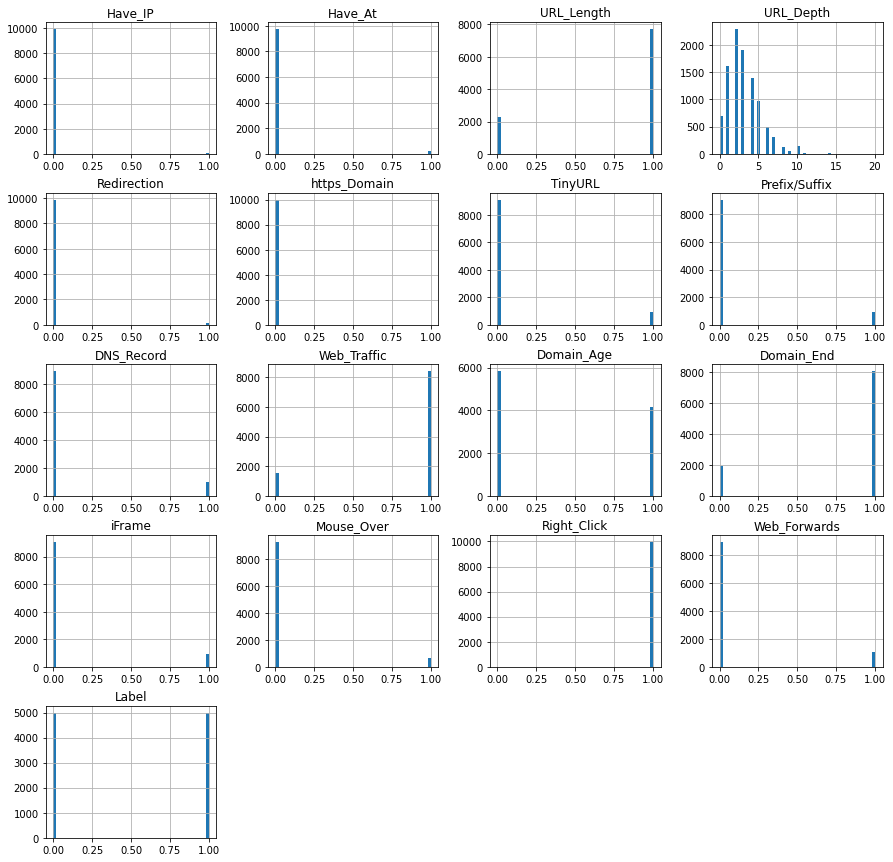

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1
1,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,1
2,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))


* Random Forest
* Multilayer Perceptrons
* XGBoost
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ML_Model = []
precision_train = []
recall_train = []
f1_train = []
log_loss_train = []
roc_auc_train = []
precision_test= []
recall_test = []
f1_test = []
log_loss_test = []
roc_auc_test = []

def storeResults(model, pt,rt,ft,lt,rat,ptt,rtt,ftt,ltt,ratt):
  ML_Model.append(model)
  precision_train.append(round(pt, 3))
  recall_train.append(round(rt, 3))
  f1_train.append(round(ft, 3))
  log_loss_train.append(round(lt, 3))
  roc_auc_train.append(round(rat, 3))
  precision_test.append(round(ptt, 3))
  recall_test.append(round(rtt, 3))
  f1_test.append(round(ftt, 3))
  log_loss_test.append(round(ltt, 3))
  roc_auc_test.append(round(ratt, 3))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,log_loss,roc_auc_score
a1=precision_score(y_train,y_train_forest)
b1=recall_score(y_train,y_train_forest)
c1=f1_score(y_train,y_train_forest)
d1=log_loss(y_train,y_train_forest)
e1=roc_auc_score(y_train,y_train_forest)
f1=precision_score(y_test,y_test_forest)
g1=recall_score(y_test,y_test_forest)
h1=f1_score(y_test,y_test_forest)
i1=log_loss(y_test,y_test_forest)
j1=roc_auc_score(y_test,y_test_forest)

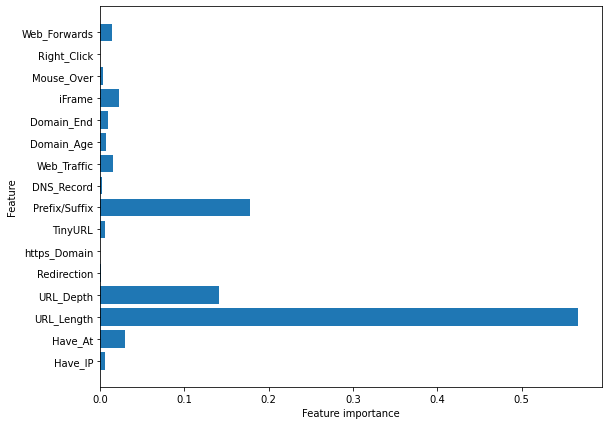

In [ ]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('Random Forest',a1,b1,c1,d1,e1,f1,g1,h1,i1,j1)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,log_loss,roc_auc_score
a2=precision_score(y_train,y_train_svm)
b2=recall_score(y_train,y_train_svm)
c2=f1_score(y_train,y_train_svm)
d2=log_loss(y_train,y_train_svm)
e2=roc_auc_score(y_train,y_train_svm)
f2=precision_score(y_test,y_test_svm)
g2=recall_score(y_test,y_test_svm)
h2=f1_score(y_test,y_test_svm)
i2=log_loss(y_test,y_test_svm)
j2=roc_auc_score(y_test,y_test_svm)

0.943577430972389


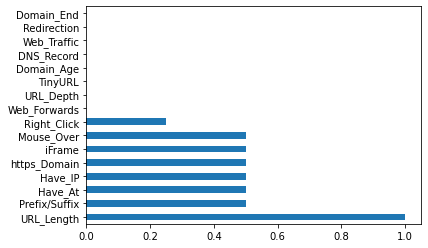

In [ ]:
pd.Series(abs(svm.coef_[0]/4), index=X.columns).nlargest(16).plot(kind='barh')

In [ ]:
storeResults('SVM',a2,b2,c2,d2,e2,f2,g2,h2,i2,j2)

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,log_loss,roc_auc_score
a3=precision_score(y_train,y_train_mlp)
b3=recall_score(y_train,y_train_mlp)
c3=f1_score(y_train,y_train_mlp)
d3=log_loss(y_train,y_train_mlp)
e3=roc_auc_score(y_train,y_train_mlp)
f3=precision_score(y_test,y_test_mlp)
g3=recall_score(y_test,y_test_mlp)
h3=f1_score(y_test,y_test_mlp)
i3=log_loss(y_test,y_test_mlp)
j3=roc_auc_score(y_test,y_test_mlp)

0.943577430972389


In [ ]:
storeResults('Multi-layer percepton',a3,b3,c3,d3,e3,f3,g3,h3,i3,j3)

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,log_loss,roc_auc_score
a4=precision_score(y_train,y_train_xgb)
b4=recall_score(y_train,y_train_xgb)
c4=f1_score(y_train,y_train_xgb)
d4=log_loss(y_train,y_train_xgb)
e4=roc_auc_score(y_train,y_train_xgb)
f4=precision_score(y_test,y_test_xgb)
g4=recall_score(y_test,y_test_xgb)
h4=f1_score(y_test,y_test_xgb)
i4=log_loss(y_test,y_test_xgb)
j4=roc_auc_score(y_test,y_test_xgb)


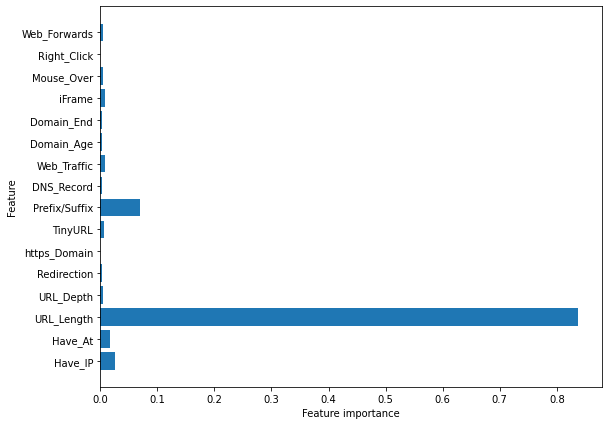

In [ ]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('XGboost',a4,b4,c4,d4,e4,f4,g4,h4,i4,j4)

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Precision_Train': precision_train,
    'Recall_Train': recall_train ,
    'F1_Score_Train': f1_train ,
    'Log_loss_Train': log_loss_train,
    'Roc_Auc_Train': roc_auc_train ,
    'Precision_Test': precision_test,
    'Recall_Test': recall_test ,
    'F1_Score_Test': f1_test ,
    'Log_loss_Test': log_loss_test ,
    'Roc_Auc_Test': roc_auc_test })
results

,ML Model,Precision_Train,Recall_Train,F1_Score_Train,Log_loss_Train,Roc_Auc_Train,Precision_Test,Recall_Test,F1_Score_Test,Log_loss_Test,Roc_Auc_Test
0,Random Forest,0.980,0.643,0.777,6.403,0.815,0.971,0.700,0.814,5.492,0.840
1,SVM,0.967,0.614,0.751,7.046,0.796,0.968,0.672,0.793,5.992,0.825
2,Multi-layer percepton,0.928,0.787,0.852,4.745,0.863,0.914,0.814,0.861,4.490,0.870
3,XGboost,0.922,0.797,0.855,4.676,0.865,0.904,0.820,0.860,4.559,0.868


In [ ]:
results.sort_values(by=['Precision_Train', 'Recall_Train','F1_Score_Train','Log_loss_Train','Roc_Auc_Train','Precision_Test','Recall_Test','F1_Score_Test','Log_loss_Test','Roc_Auc_Test'], ascending=False)

,ML Model,Precision_Train,Recall_Train,F1_Score_Train,Log_loss_Train,Roc_Auc_Train,Precision_Test,Recall_Test,F1_Score_Test,Log_loss_Test,Roc_Auc_Test
0,Random Forest,0.980,0.643,0.777,6.403,0.815,0.971,0.700,0.814,5.492,0.840
1,SVM,0.967,0.614,0.751,7.046,0.796,0.968,0.672,0.793,5.992,0.825
2,Multi-layer percepton,0.928,0.787,0.852,4.745,0.863,0.914,0.814,0.861,4.490,0.870
3,XGboost,0.922,0.797,0.855,4.676,0.865,0.904,0.820,0.860,4.559,0.868


In [ ]:
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)